# Linear Regression using sklearn

In this video we are going to learn
 - Implementing a simple linear regression model using sklearn
 - Evaluating the linear regression model
 

## Dataset

In this example we will be working with the vehicle fuel consumption dataset

The source of the dataset https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64

This dataset has 14 features with one target variable (CO2 Emissions)

 - Model Year
 - Make
 - Model
  - 4WD/4X4 = Four-wheel drive
  - AWD = All-wheel drive
  - FFV = Flexible-fuel vehicle
  - SWB = Short wheelbase
  - LWB = Long wheelbase
  - EWB = Extended wheelbase
 - Transmission
  - A = automatic
  - AM = automated manual
  - AS = automatic with select shift
  - AV = continuously variable
  - M = manual
  - 3 – 10 = Number of gears
 - Fuel type	
  - X = regular gasoline
  - Z = premium gasoline
  - D = diesel
  - E = ethanol (E85)
  - N = natural gas
 - Fuel consumption
  - City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) 
  - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)
 - CO2 rating
  - the tailpipe emissions of carbon dioxide rated on a scale from 1 (worst) to 10 (best)
 - Smog rating
  - the tailpipe emissions of smog-forming pollutants rated on a scale from 1 (worst) to 10 (best)
 - CO2 emissions
  - the tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

 
### Problem Statement
Predict the CO2 Emissions of a car based on the characteristics of the car.


$$CO_2 \ Emisson = \theta_0 + \theta_1 *Engine \ Size$$


In [1]:
# import all the required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [2]:
# import and preview the dataset
data = pd.read_csv('/Users/sylvia/Desktop/datasets/fuel_consumption.csv')
data.head()

,Model Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2019,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,199,6,3
1,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS9,Z,12.2,9.0,10.8,26,252,4,3
2,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6,AS9,Z,12.2,9.5,11.0,26,258,4,3
3,2019,Acura,MDX Hybrid AWD,SUV: Small,3.0,6,AM7,Z,9.1,9.0,9.0,31,210,5,3
4,2019,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,26,261,4,3


In [3]:
# check shape of the dataset
data.shape

(1049, 15)

In [4]:
# check dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model Year            1049 non-null   int64  
 1   Make                  1049 non-null   object 
 2   Model                 1049 non-null   object 
 3   Vehicle Class         1049 non-null   object 
 4   Engine Size (L)       1049 non-null   float64
 5   Cylinders             1049 non-null   int64  
 6   Transmission          1049 non-null   object 
 7   Fuel Type             1049 non-null   object 
 8   City (L/100 km)       1049 non-null   float64
 9   Hwy (L/100 km)        1049 non-null   float64
 10  Comb (L/100 km)       1049 non-null   float64
 11  Comb (mpg)            1049 non-null   int64  
 12  CO2 Emissions (g/km)  1049 non-null   int64  
 13  CO2 Rating            1049 non-null   int64  
 14  Smog Rating           1049 non-null   int64  
dtypes: float64(4), int64(

In [5]:
# we will start with simple linear regression with independent variable as Engine Size
# save arrays in variables X and y

X = np.array(data['Engine Size (L)'])
y = np.array(data['CO2 Emissions (g/km)'])

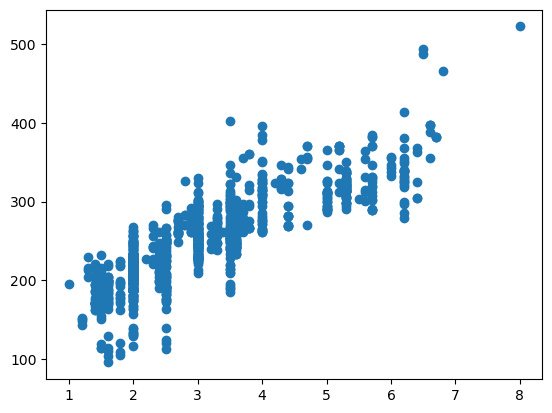

In [6]:
# plot the dependent and independent variable on a scatter plot

plt.scatter(X,y);

In [7]:
X

array([2.4, 3.5, 3.5, ..., 2. , 2. , 2. ])

Below in reshape (-1) will be decided based on columns required, here just require 1 column so 2nd parameter given is (1).

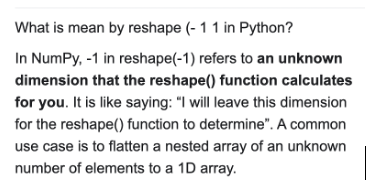

In [8]:
X.reshape(-1,1)    # Returns an array containing the same data with a new shape.


array([[2.4],
       [3.5],
       [3.5],
       ...,
       [2. ],
       [2. ],
       [2. ]])

In [9]:
y

array([199, 252, 258, ..., 242, 233, 250])

In [10]:
# model a linear regression using sklearn

# define an object for linear regression model
lr =LinearRegression()

# fit the linear regresion model for give data
lr.fit(X.reshape(-1,1),y)

# print the intercept and the coefficients
print("The intercept of the Lienar Regression model is: ", lr.intercept_)
print("The coefficient of the Linear Regression model is: ",lr.coef_)

The intercept of the Lienar Regression model is:  138.09335498409126
The coefficient of the Linear Regression model is:  [36.43258353]


## $$CO_2 \ Emisson = 138.09 + 36.43 *Engine \ Size$$

In [11]:
# calculate the predicted value using the above equation
y_pred = lr.intercept_ + lr.coef_*X
y_pred

array([225.53155545, 265.60739734, 265.60739734, ..., 210.95852204,
       210.95852204, 210.95852204])

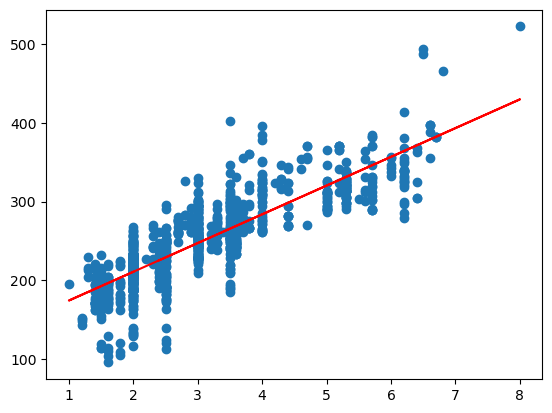

In [12]:
# plot a scatter plot alogn with the regression line
plt.scatter(X,y)
plt.plot(X,y_pred,color='r');


In [13]:
# calculate the evaluation metrics of R2 score and Mean Squared Error

print("R2 Score of linear regression model is:", r2_score(y, y_pred))
print("Mean Squared Error of linear regression model is: ", mean_squared_error(y, y_pred))

R2 Score of linear regression model is: 0.7073674260910153
Mean Squared Error of linear regression model is:  949.258487996897
